In [20]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt

from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

In [24]:
dados = pd.read_csv('./Bitcoin_data.csv')[::-1].reset_index(drop=True)
dados['Último'] = dados['Último'].str.replace('.', '').str.replace(',', '.').astype(float)
dados['Retornos'] = np.log(dados['Último']/dados['Último'].shift(1))
dados = dados[['Data', 'Último', 'Retornos']].dropna()
dados

,Data,Último,Retornos
1,02.01.2019,4048.5,0.021345
2,03.01.2019,3923.2,-0.031439
3,04.01.2019,3954.9,0.008048
4,05.01.2019,3911.0,-0.011162
5,06.01.2019,4171.5,0.064483
...,...,...,...
2149,19.11.2024,92172.0,0.017920
2150,20.11.2024,94243.0,0.022220
2151,21.11.2024,98348.0,0.042636
2152,22.11.2024,98683.0,0.003400


Shapiro-Wilk Test Statistic: 0.898719289735465
p-value: 1.5869004225797788e-35


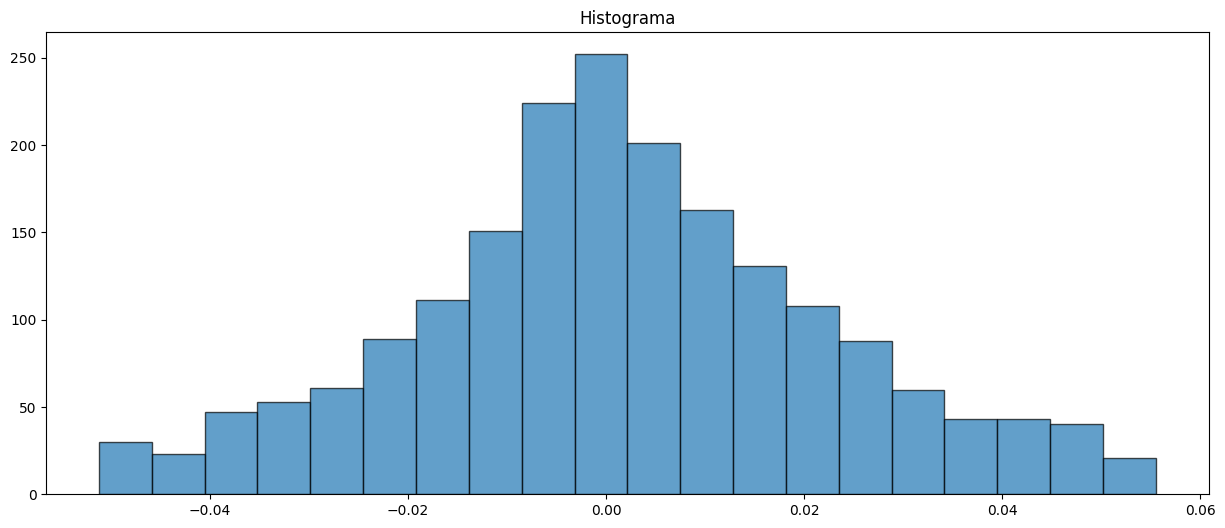

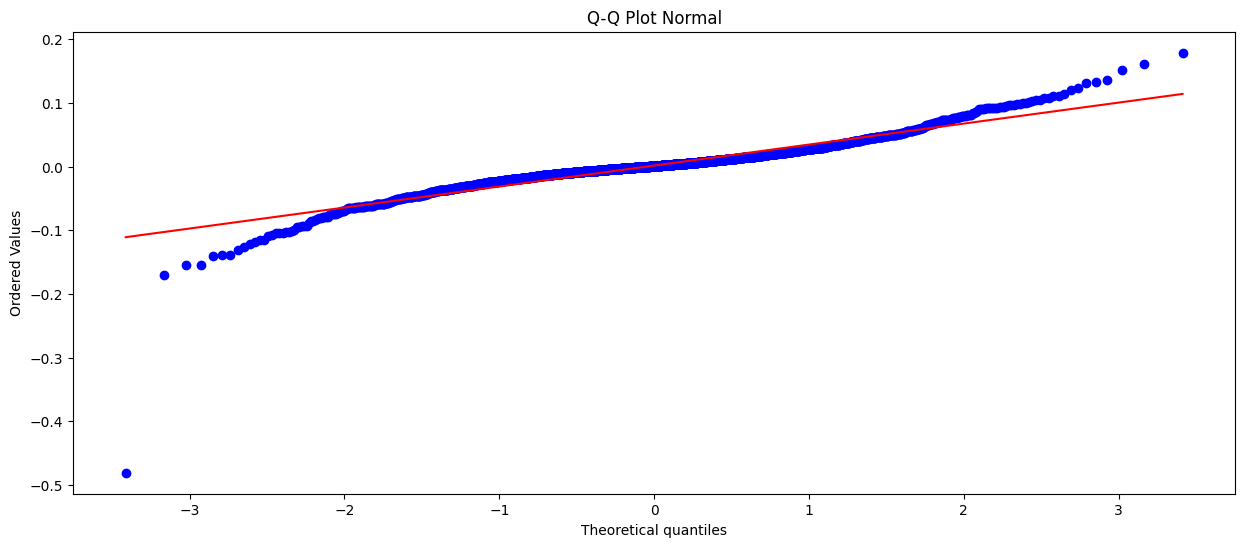

Parâmetros ajustados da normal: μ=0.00, σ=0.03
Estatística do teste KS para normal: 0.0907, p-valor: 0.0000
Os dados não seguem uma distribuição normal.


Parâmetros ajustados da distribuição t: ν=2.56, μ=0.00, σ=0.02
Estatística do teste KS: 0.0235, p-valor: 0.1815
Não há evidência para rejeitar a hipótese de que os dados seguem uma distribuição t.


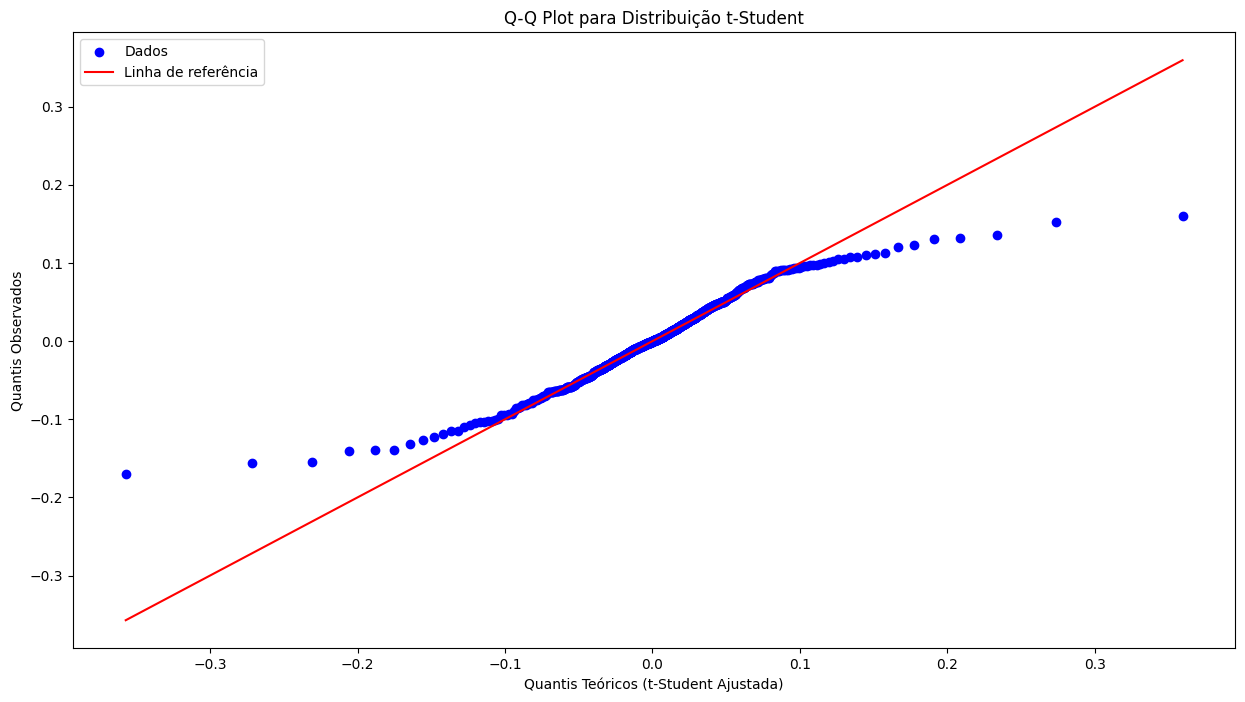

In [22]:
data = dados['Retornos']

n_strip = int(len(dados)*0.05)
data_strip = np.sort(dados['Retornos'])[n_strip:-n_strip]

# Teste de Shapiro-Wilk
shapiro_test = stats.shapiro(data)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

# Histograma e Q-Q Plot Normal
plt.figure(figsize=(15, 6))
plt.hist(data_strip, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histograma')
plt.show()

plt.figure(figsize=(15, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot Normal')
plt.show()


# Teste Normal
norm_params = stats.norm.fit(data)
print(f"Parâmetros ajustados da normal: μ={norm_params[0]:.2f}, σ={norm_params[1]:.2f}")

# Teste KS para a normal
ks_stat_norm, p_value_norm = stats.kstest(data, "norm", args=norm_params)
print(f"Estatística do teste KS para normal: {ks_stat_norm:.4f}, p-valor: {p_value_norm:.4f}")

if p_value_norm > 0.05:
    print("Não há evidência para rejeitar a hipótese de que os dados seguem uma distribuição normal.\n\n")
else:
    print("Os dados não seguem uma distribuição normal.\n\n")


# Teste t
t_params = stats.t.fit(data)
df, loc, scale = t_params

t_params = stats.t.fit(data)
print(f"Parâmetros ajustados da distribuição t: ν={t_params[0]:.2f}, μ={t_params[1]:.2f}, σ={t_params[2]:.2f}")

# Teste KS comparando os dados à distribuição t ajustada
ks_stat, p_value = stats.kstest(data, "t", args=t_params)
print(f"Estatística do teste KS: {ks_stat:.4f}, p-valor: {p_value:.4f}")

if p_value > 0.05:
    print("Não há evidência para rejeitar a hipótese de que os dados seguem uma distribuição t.")
else:
    print("Os dados não seguem uma distribuição t.")

# Criar o Q-Q Plot t-student

# Ajustar os parâmetros da distribuição t
t_params = stats.t.fit(data)
df, loc, scale = t_params

# Calcular quantis teóricos e observados
quantiles_theoretical = np.linspace(0, 1, len(data))
quantiles_observed = np.sort(data)
quantiles_t = stats.t.ppf(quantiles_theoretical, df, loc=loc, scale=scale)

# Criar o Q-Q Plot
plt.figure(figsize=(15, 8))
plt.scatter(quantiles_t, quantiles_observed, label="Dados", color="blue")
plt.plot(quantiles_t, quantiles_t, color="red", label="Linha de referência")

plt.title("Q-Q Plot para Distribuição t-Student")
plt.xlabel("Quantis Teóricos (t-Student Ajustada)")
plt.ylabel("Quantis Observados")
plt.legend()
plt.show()


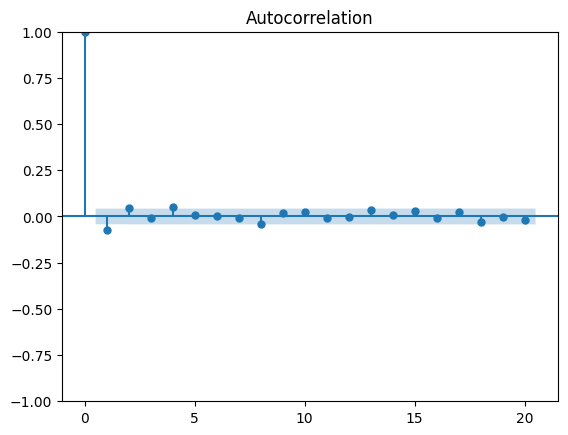

Estatística de Durbin-Watson: 2.1371


      lb_stat  lb_pvalue    bp_stat  bp_pvalue
1   10.747753   0.001044  10.732791   0.001053
2   15.372050   0.000459  15.348504   0.000465
3   15.586620   0.001378  15.562577   0.001394
4   20.834479   0.000342  20.795824   0.000348
5   20.960686   0.000824  20.921621   0.000838
6   20.960690   0.001865  20.921625   0.001895
7   21.089020   0.003641  21.049420   0.003698
8   24.263948   0.002069  24.209615   0.002113
9   25.072350   0.002892  25.013891   0.002956
10  26.091779   0.003619  26.027643   0.003703


In [23]:
plot_acf(data, lags=20)
plt.show()

# Teste Durbin-Watson
dw_stat = durbin_watson(data)
print(f"Estatística de Durbin-Watson: {dw_stat:.4f}\n\n")

# Teste Ljung-Box e BoxPierce
box_pierce = acorr_ljungbox(data, lags=10, return_df=True, boxpierce=True)
print(f'{box_pierce}')